# Exploratory Data Analysis (EDA) for NIFTY Feature-Engineered Data

This notebook helps you explore and visualize the features created for NIFTY data.

- Data: `data/nifty/train/full_featured.csv`
- Libraries: pandas, numpy, matplotlib, seaborn

---

In [8]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid', palette='muted', font_scale=1.1)
%matplotlib inline

In [9]:
# 2. Load the feature-engineered data
data_path = '../../data/nifty/train/full_featured.csv'
df = pd.read_csv(data_path)
print(f'Loaded {len(df)} rows and {len(df.columns)} columns.')
df.head()

Loaded 6175 rows and 29 columns.


,date,open,high,low,close,volume,daily_return,log_return,price_range,ma_5,...,stoch_smoothk,stoch_smoothd,dow_trend_spec_raw,dow_trend_spec,range,avg_range,is_mother_candle,mother_candle_trend,final_trend,trend_code
0,2001-01-01 00:00:00+05:30,1263.50,1276.15,1250.65,1254.30,0,NaN,NaN,25.50,NaN,...,NaN,NaN,Sideways,Sideways,25.50,25.500000,False,Sideways,Sideways,1
1,2001-01-02 00:00:00+05:30,1254.25,1279.59,1248.55,1271.80,0,0.013952,0.013856,31.04,NaN,...,NaN,NaN,Uptrend,Uptrend,31.04,28.270000,False,Sideways,Uptrend,2
2,2001-01-03 00:00:00+05:30,1271.80,1293.55,1263.95,1291.25,0,0.015293,0.015178,29.60,NaN,...,NaN,NaN,Uptrend,Uptrend,29.60,28.713333,False,Sideways,Uptrend,2
3,2001-01-04 00:00:00+05:30,1291.30,1331.35,1291.30,1307.65,0,0.012701,0.012621,40.05,NaN,...,NaN,NaN,Uptrend,Uptrend,40.05,31.547500,True,Sideways,Uptrend,2
4,2001-01-05 00:00:00+05:30,1307.55,1330.30,1306.25,1327.25,0,0.014989,0.014877,24.05,1290.45,...,NaN,NaN,Sideways,Uptrend,24.05,30.048000,False,Sideways,Sideways,1


## 3. Summary statistics and missing values

In [10]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,6175.0,8379.847913,6576.897546,853.000000,3488.925000,6010.700000,11191.425000,26248.250000
high,6175.0,8426.814303,6599.374656,877.000000,3518.075000,6042.150000,11267.275000,26277.350000
low,6175.0,8322.224489,6545.962331,849.950000,3444.375000,5968.100000,11101.500000,26151.400000
close,6175.0,8375.758157,6573.220160,854.200000,3491.725000,6000.650000,11167.675000,26216.050000
volume,6175.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
daily_return,6174.0,0.000579,0.013382,-0.129805,-0.005493,0.000870,0.007182,0.177438
log_return,6174.0,0.000489,0.013410,-0.139038,-0.005509,0.000869,0.007156,0.163341
price_range,6175.0,104.589814,92.912847,5.350000,45.955000,80.950000,136.125000,1898.050000
ma_5,6171.0,8372.394892,6565.920967,869.670000,3485.060000,6005.440000,11178.580000,26055.720000
ma_20,6156.0,8359.897212,6539.280005,903.582500,3500.874375,5986.817500,11172.846875,25526.972500


In [11]:
# Missing values
missing = df.isnull().sum()
missing[missing > 0]

daily_return             1
log_return               1
ma_5                     4
ma_20                   19
volatility_5             5
volatility_20           20
rsi_14                  13
macd_12_26              25
macd_signal_12_26       33
macd_histogram_12_26    33
macd_signal_strength    33
stoch_14                13
stoch_smoothk           15
stoch_smoothd           17
dtype: int64

## 4. Distribution plots for key features

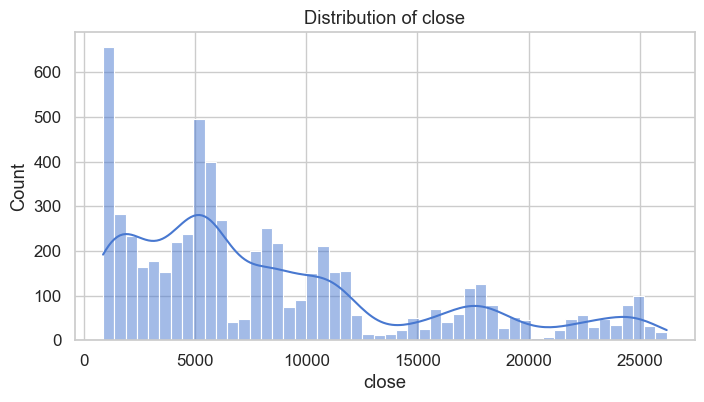

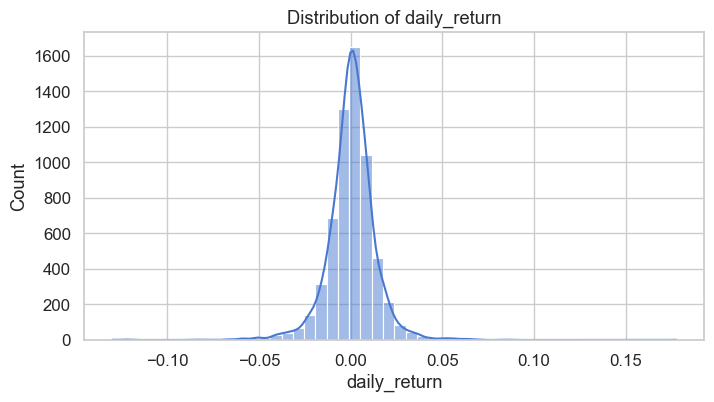

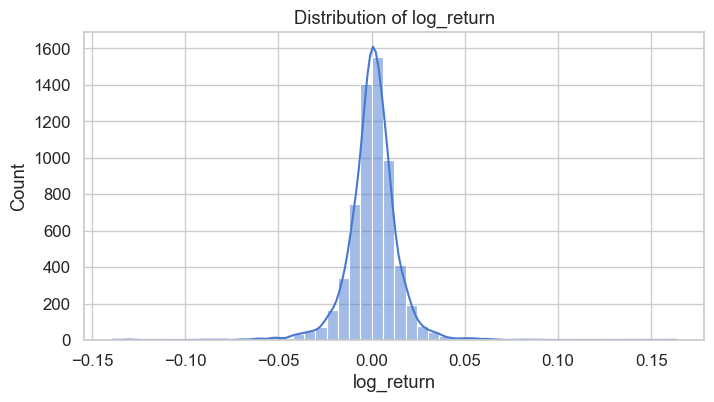

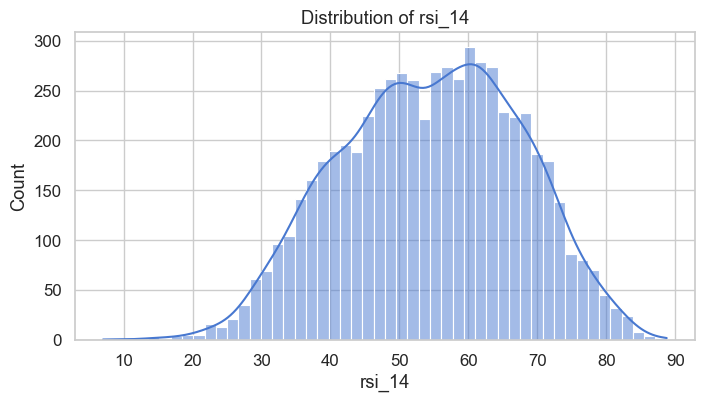

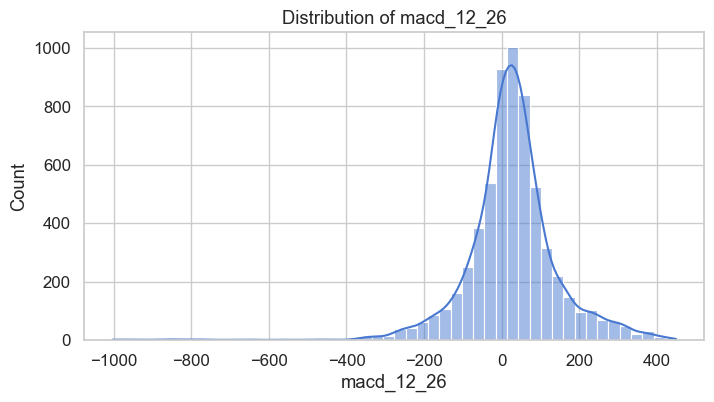

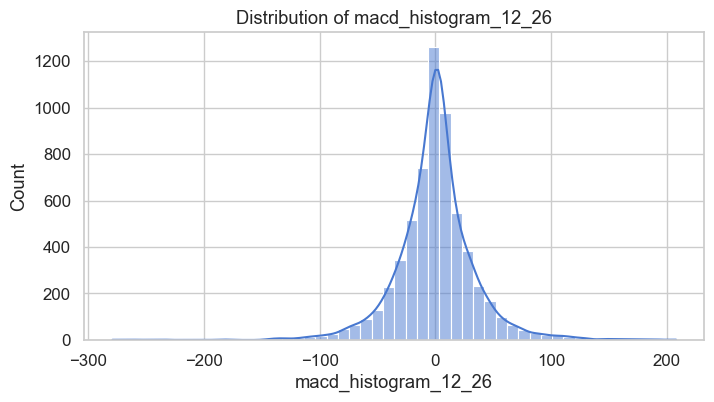

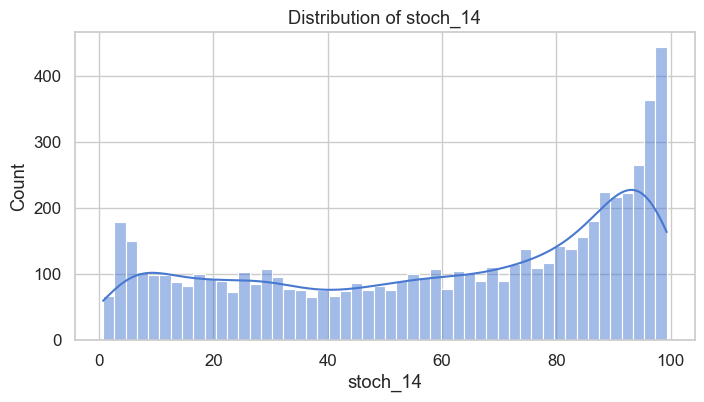

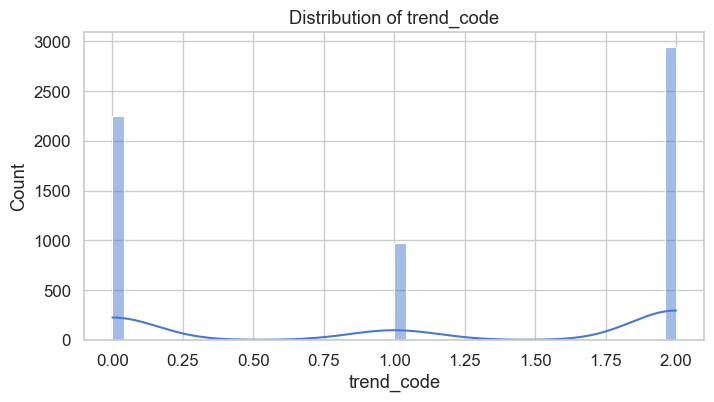

In [12]:
# Select a few key features for distribution plots
features = ['close', 'daily_return', 'log_return', 'rsi_14', 'macd_12_26', 'macd_histogram_12_26', 'stoch_14','trend_code']
for feat in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feat].dropna(), kde=True, bins=50)
    plt.title(f'Distribution of {feat}')
    plt.show()

## 5. Correlation heatmap

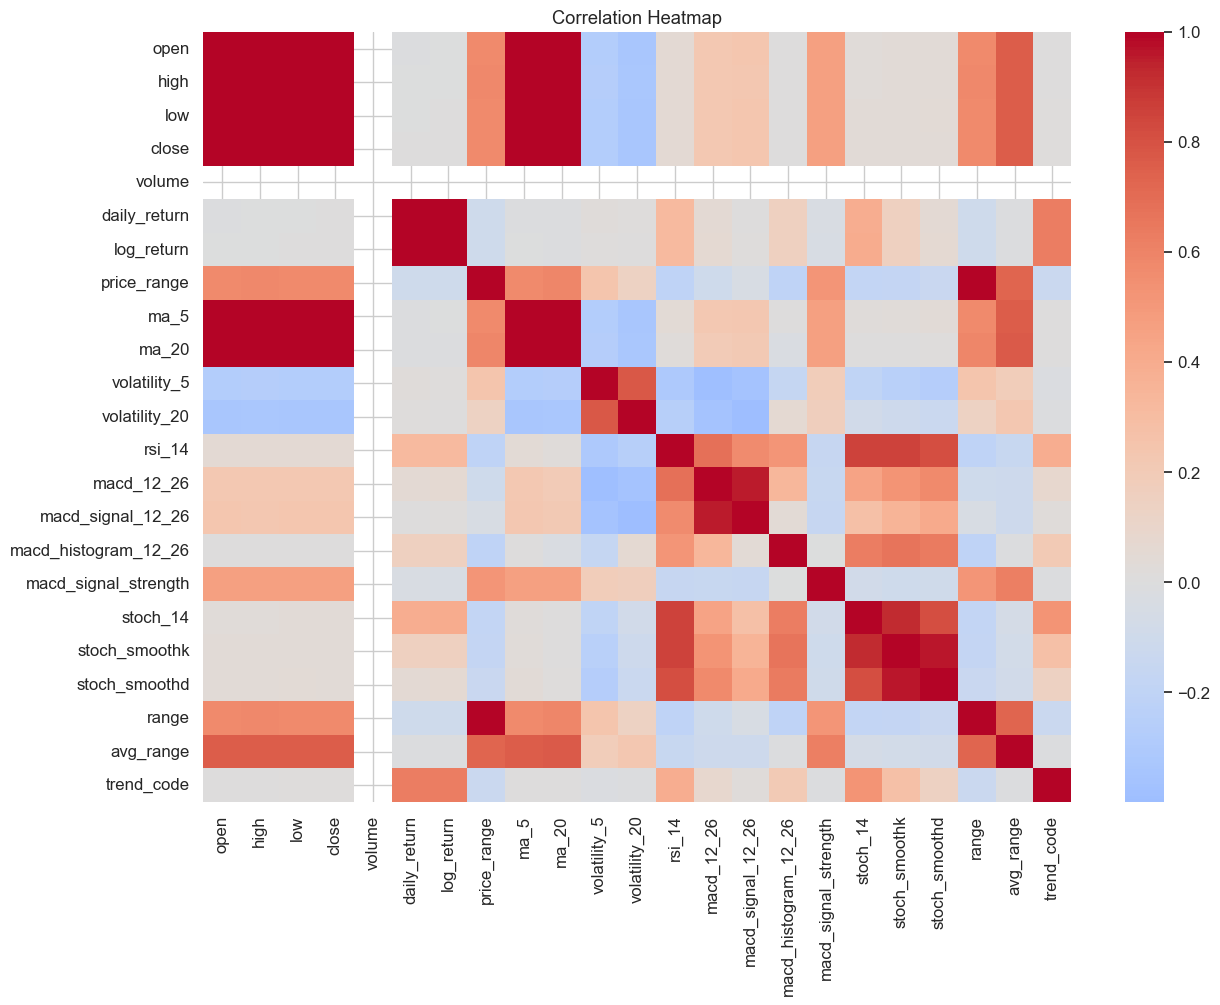

In [13]:
# Compute correlation matrix for numeric features only
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
corr = numeric_df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## 6. Time series plots for price and selected features

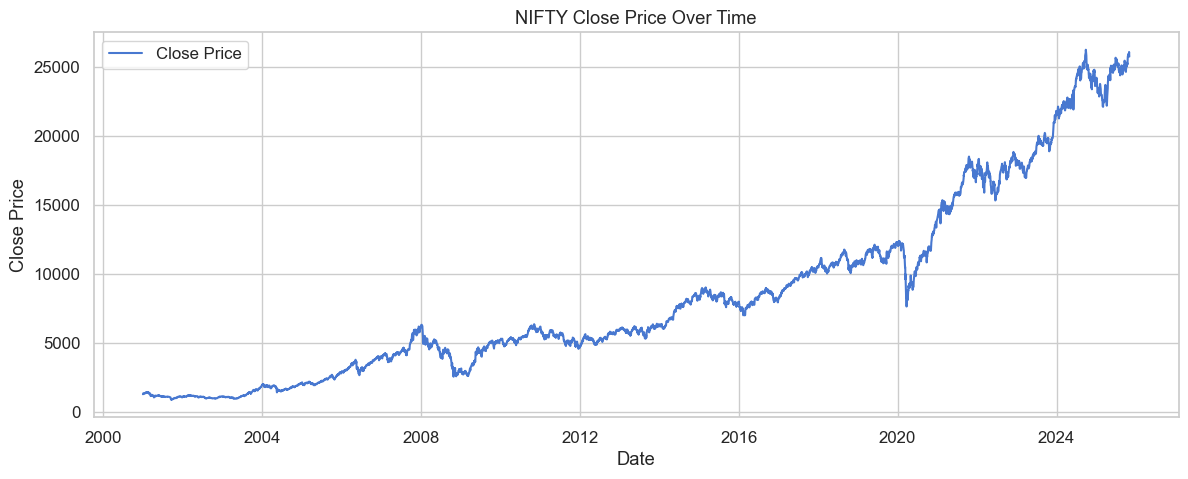

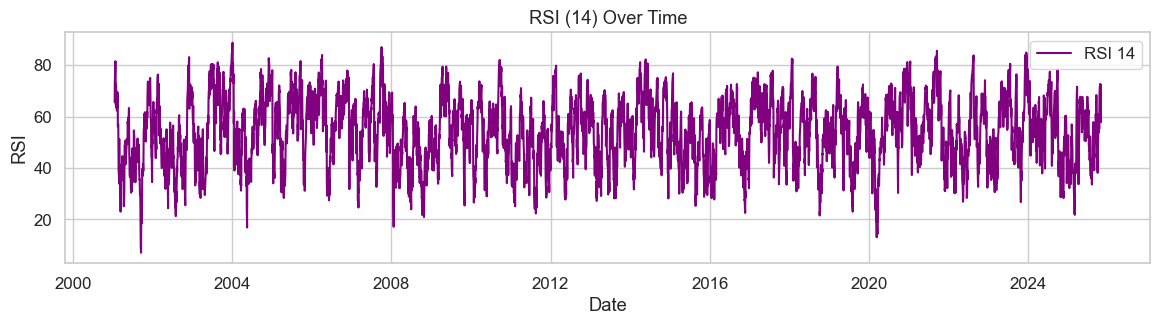

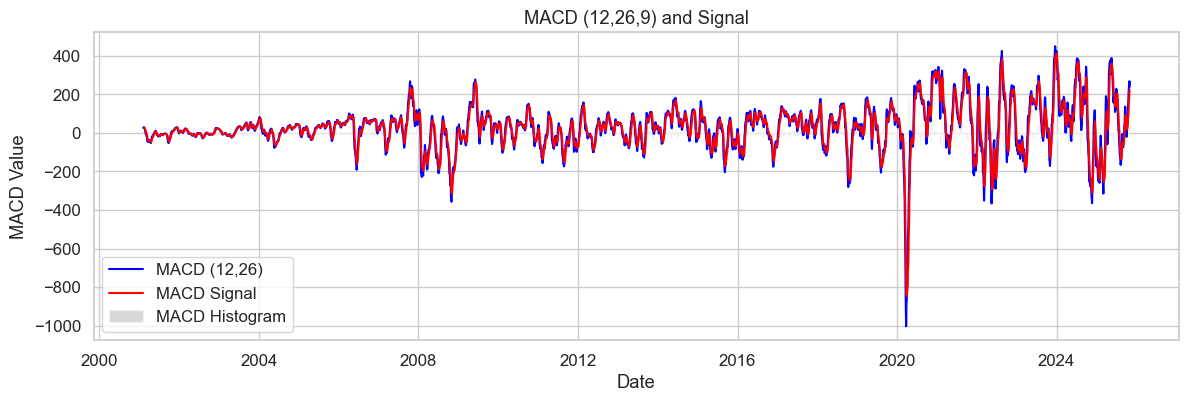

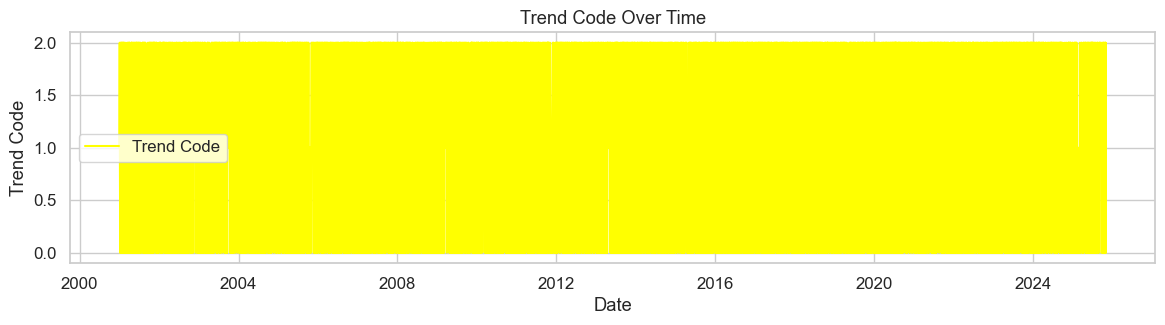

In [14]:
# Convert date column to datetime if not already
if not np.issubdtype(df['date'].dtype, np.datetime64):
    df['date'] = pd.to_datetime(df['date'])

# Plot close price
plt.figure(figsize=(14, 5))
plt.plot(df['date'], df['close'], label='Close Price')
plt.title('NIFTY Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(14, 3))
plt.plot(df['date'], df['rsi_14'], label='RSI 14', color='purple')
plt.title('RSI (14) Over Time')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

# Plot MACD and Signal
plt.figure(figsize=(14, 4))
plt.plot(df['date'], df['macd_12_26'], label='MACD (12,26)', color='blue')
plt.plot(df['date'], df['macd_signal_12_26'], label='MACD Signal', color='red')
plt.bar(df['date'], df['macd_histogram_12_26'], label='MACD Histogram', color='gray', alpha=0.3)
plt.title('MACD (12,26,9) and Signal')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()
plt.show()


# Plot RSI
plt.figure(figsize=(14, 3))
plt.plot(df['date'], df['trend_code'], label='Trend Code', color='yellow')
plt.title('Trend Code Over Time')
plt.xlabel('Date')
plt.ylabel('Trend Code')
plt.legend()
plt.show()

You can add more plots and analysis as you explore the data!
If you want to visualize other features, just add more cells.